Connection established.
Loading cypher for participants with operation read
Loading cypher for affiliations with operation read
Loading cypher for survey_data with operation read
{'net_0_friends':       Source  Target
0      32551   32391
1      32464   32391
2      32425   32391
3      32440   32391
4      32431   32391
...      ...     ...
1164   32558   32565
1165   32556   32565
1166   32528   32565
1167   32402   32565
1168   32565   32565

[1169 rows x 2 columns], 'net_1_influential':      Source  Target
0     32517   32391
1     32474   32393
2     32440   32393
3     32522   32393
4     32417   32393
..      ...     ...
271   32423   32555
272   32488   32559
273   32509   32559
274   32520   32561
275   32416   32563

[276 rows x 2 columns], 'net_2_feedback':      Source  Target
0     32407   32392
1     32554   32392
2     32434   32394
3     32424   32394
4     32437   32397
..      ...     ...
208   32453   32563
209   32416   32563
210   32559   32565
211   32556   32565
2

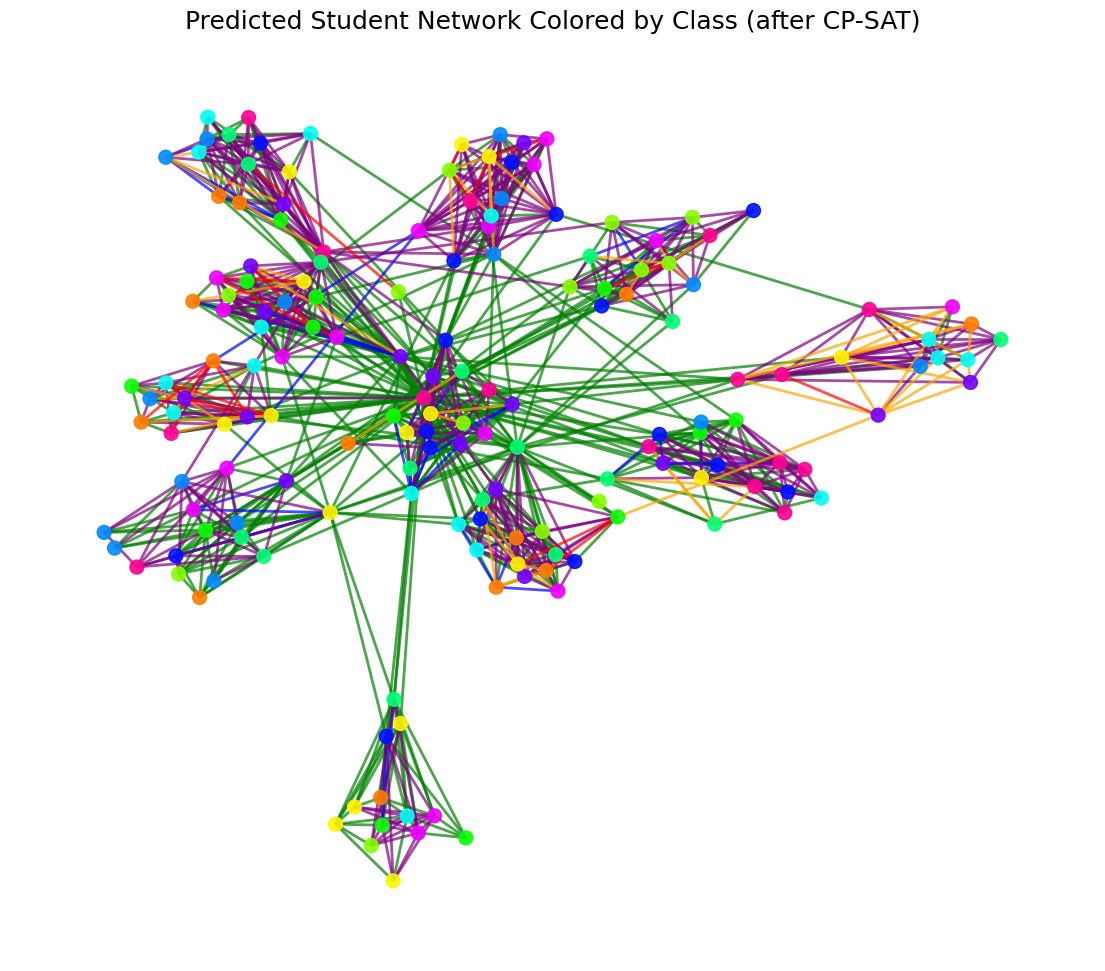

Loading cypher for processrun with operation create


2025-05-06 00:40:55,594 - dataloading.dataloader - INFO - Inserted 332 nodes and 664 relationships
2025-05-06 00:40:55,595 - dataloading.dataloader - INFO - Metrics created successfully for run ID 3
2025-05-06 00:40:55,781 - dataloading.dataloader - INFO - Inserted 332 nodes and 664 relationships
2025-05-06 00:40:55,782 - dataloading.dataloader - INFO - Survey data created successfully for run ID 3
2025-05-06 00:40:56,357 - dataloading.dataloader - INFO - Inserted 0 nodes and 1396 relationships
2025-05-06 00:40:56,358 - dataloading.dataloader - INFO - Relationships created successfully for run ID 3
2025-05-06 00:40:56,360 - dataloading.dataloader - INFO - Agent data creation completed successfully for run ID 3


{'metrics':      participant_id  friends_in_degree  friends_out_degree  friends_closeness  \
0             32469                  4                   8           0.065557   
1             32392                  7                   3           0.115508   
2             32439                  4                   4           0.145773   
3             32510                  1                  10           0.128510   
4             32432                 10                   7           0.177223   
..              ...                ...                 ...                ...   
493           32491                  3                   9           0.133763   
494           32508                 13                   9           0.190626   
495           32561                  2                   0           0.155365   
496           32485                 15                   7           0.179820   
497           32425                  3                   8           0.119734   

     friends_be

In [12]:
from algorithm.execution import execute_algorithm
from dataloading.api import DB
from dataloading.dataloader import DataLoader


db = DB()
db.connect('dataloading/db.env')
loaded_rela = ['net_0_friends', 'net_1_influential', 'net_2_feedback', 'net_3_moretime','net_4_advice', 'net_5_disrespect', 'net_affiliation']
loaded_sheet = ["participants", "affiliations", "survey_data"]
dl = DataLoader(db, folder = 'data',loaded_sheet = loaded_sheet
                , loaded_relationship= loaded_rela)

df_output_dict = dl.get_data_from_survey()
print(df_output_dict)
df_SNA, Y_pred_df, predicted_link_df = execute_algorithm(df_output_dict)


# Data mapping - adding index
df_SNA["Participant_ID"] = df_SNA.index
Y_pred_df["Participant_ID"] = Y_pred_df.index


push_data_dict = {
    "df": df_SNA,
    "Y_pred_df": Y_pred_df,
    "predicted_links": predicted_link_df
}

dl.create_agent_data(push_data_dict)

print(dl.get_agent_data())
